In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load similarity scores
sim_clip = np.load('sim_clip.npy')
sim_gpt4 = np.load('sim_gpt4.npy')
sim_clip_only_prompt = np.load('sim_clip_only_prompt.npy')
sim_gpt4_only_prompt = np.load('sim_gpt4_only_prompt.npy')
sim_gpt4_color = np.load('sim_gpt4_color.npy')
sim_gpt4_color2 = np.load('sim_gpt4_color2.npy')

# load bandwidth savings
bws_clip = np.load('bws_clip.npy')
bws_gpt4 = np.load('bws_gpt4.npy')
bws_clip_only_prompt = np.load('bws_clip_only_prompt.npy')
bws_gpt4_only_prompt = np.load('bws_gpt4_only_prompt.npy')
bws_gpt4_color = np.load('bws_gpt4_color.npy')
bws_gpt4_color2 = np.load('bws_gpt4_color2.npy')

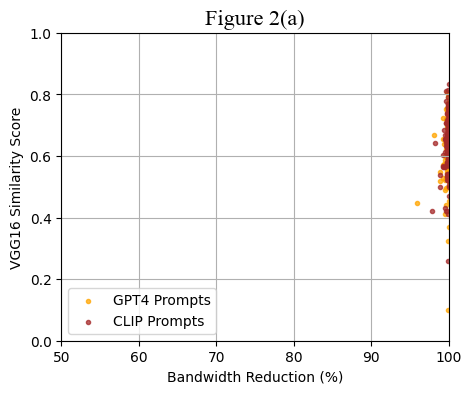

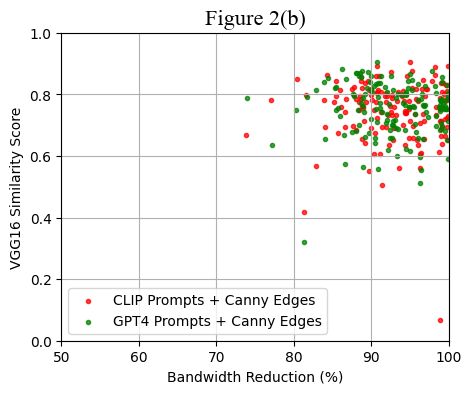

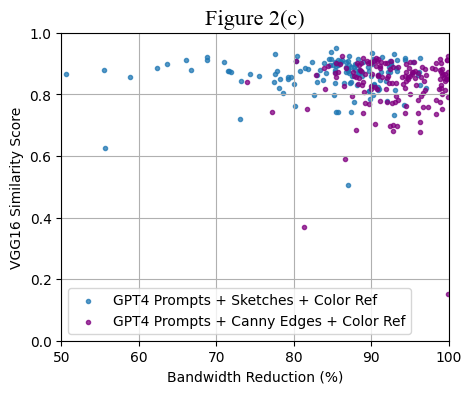

In [8]:
import matplotlib.pyplot as plt
import numpy as np

csfont = {'fontname':'Times New Roman'}

plt.figure(figsize=(5, 4))

plt.scatter(bws_clip_only_prompt, sim_clip_only_prompt, alpha=0.75, marker='.', color='orange', label='GPT4 Prompts')
plt.scatter(bws_gpt4_only_prompt, sim_gpt4_only_prompt, alpha=0.75, marker='.', color='brown', label='CLIP Prompts')

plt.xlabel('Bandwidth Reduction (%)')
plt.ylabel('VGG16 Similarity Score')
plt.xlim(50, 100)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.legend(loc='lower left')
plt.title("Figure 2(a)", size=16, **csfont)
plt.show()

plt.figure(figsize=(5, 4))

plt.scatter(bws_clip, sim_clip, alpha=0.75, marker='.', color='red', label='CLIP Prompts + Canny Edges')
plt.scatter(bws_gpt4, sim_gpt4, alpha=0.75, marker='.', color='green', label='GPT4 Prompts + Canny Edges')

plt.xlabel('Bandwidth Reduction (%)')
plt.ylabel('VGG16 Similarity Score')
plt.xlim(50, 100)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.legend(loc='lower left')
plt.title("Figure 2(b)", size=16, **csfont)
plt.show()

plt.figure(figsize=(5, 4))

plt.scatter(bws_gpt4_color, sim_gpt4_color, alpha=0.75, marker='.', label='GPT4 Prompts + Sketches + Color Ref')
plt.scatter(bws_gpt4_color2, sim_gpt4_color2, alpha=0.75, marker='.', color='purple', label='GPT4 Prompts + Canny Edges + Color Ref')

plt.xlabel('Bandwidth Reduction (%)')
plt.ylabel('VGG16 Similarity Score')
plt.xlim(50, 100)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.legend(loc='lower left')
plt.title("Figure 2(c)", size=16, **csfont)
plt.show()

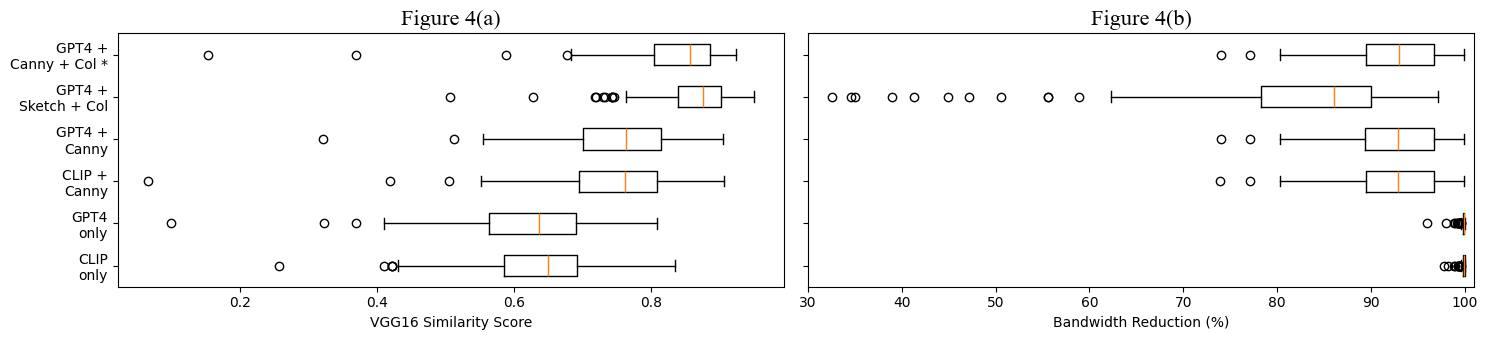

In [9]:
# Combine the data for boxplots and violin plots
all_bandwidth_savings = [bws_gpt4_only_prompt, bws_clip_only_prompt, bws_clip, bws_gpt4, bws_gpt4_color, bws_gpt4_color2]
all_similarity_scores = [sim_gpt4_only_prompt, sim_clip_only_prompt, sim_clip, sim_gpt4, sim_gpt4_color, sim_gpt4_color2]
labels = ['CLIP\nonly', 'GPT4\nonly', 'CLIP +\nCanny', 'GPT4 +\nCanny', 'GPT4 +\nSketch + Col', 'GPT4 +\nCanny + Col *']


csfont = {'fontname':'Times New Roman'}

# Creating boxplots
plt.figure(figsize=(15, 3.5))
plt.subplot(1, 2, 1)
plt.boxplot(all_similarity_scores, labels=labels, vert=False)
plt.title('Figure 4(a)', size=16,**csfont)
plt.xlabel('VGG16 Similarity Score')

plt.subplot(1, 2, 2)
plt.boxplot(all_bandwidth_savings, labels=["" for _ in range(len(labels))], vert=False)
plt.title('Figure 4(b)', size=16,**csfont)
plt.xlabel('Bandwidth Reduction (%)')
plt.xlim(30, 101)

plt.tight_layout()
plt.show()